<a href="https://colab.research.google.com/github/BehrangEbrahimi13/Repo_Paper_01/blob/main/paper01_with_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-ce9d290ff9fb>:29: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature2, correlation in row.iteritems():


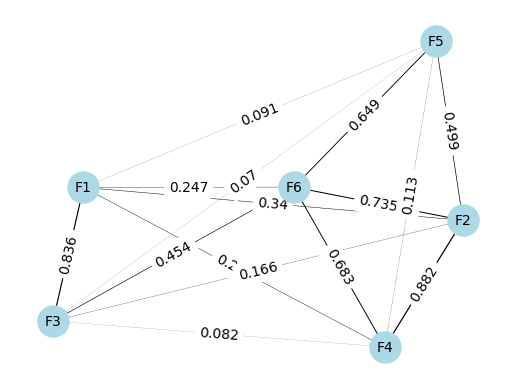

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Example dataset with features
data = {
    'F1': [1, 2, 3, 4, 5],
    'F2': [2, 24, 6, 50, 10],
    'F3': [25, 3, 15, 4, -25],
    'F4': [7, 4, 9, 78, 0],
    'F5': [16, -11, 6, 3, 12],
    'F6': [1, 3, 2, 4, -1]
}

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data)

# Calculate the correlation matrix
corr_matrix = df.corr().round(3).abs()

# Create a graph
G = nx.Graph()

# Add nodes (features) to the graph
G.add_nodes_from(corr_matrix.columns)

# Iterate over the correlation matrix and add edges (correlations) to the graph
for feature1, row in corr_matrix.iterrows():
    for feature2, correlation in row.iteritems():
        if feature1 != feature2:
            G.add_edge(feature1, feature2, weight=correlation)

# Draw the graph
pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
nx.draw_networkx_edges(G, pos, width=list(weights.values()))
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.axis('off')
plt.show()

<ipython-input-18-25c179403216>:31: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature2, correlation in row.iteritems():


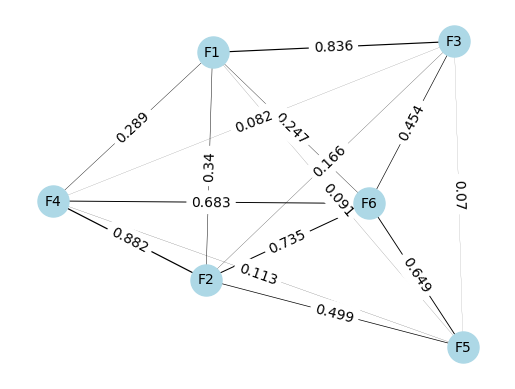

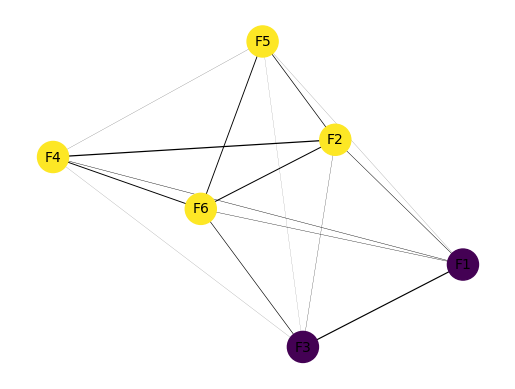

F1 : 1.803
F2 : 2.622
F3 : 1.608
F4 : 2.0490000000000004
F5 : 1.422
F6 : 2.768
Community: 0, Best Node: F1
Community: 1, Best Node: F6


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain


# Example dataset with features
data = {
    'F1': [1, 2, 3, 4, 5],
    'F2': [2, 24, 6, 50, 10],
    'F3': [25, 3, 15, 4, -25],
    'F4': [7, 4, 9, 78, 0],
    'F5': [16, -11, 6, 3, 12],
    'F6': [1, 3, 2, 4, -1]
}

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data)

# Calculate the correlation matrix
corr_matrix = df.corr().round(3).abs()

# Create a graph
G = nx.Graph()

# Add nodes (features) to the graph
G.add_nodes_from(corr_matrix.columns)

# Iterate over the correlation matrix and add edges (correlations) to the graph
for feature1, row in corr_matrix.iterrows():
    for feature2, correlation in row.iteritems():
        if feature1 != feature2:
            G.add_edge(feature1, feature2, weight=correlation)

# Draw the graph
pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
nx.draw_networkx_edges(G, pos, width=list(weights.values()))
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.axis('off')
plt.show()

# Apply the Louvain algorithm for community detection
partition = community_louvain.best_partition(G)

# Draw the graph with node colors based on community
pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}
nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), cmap='viridis', node_size=500)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
nx.draw_networkx_edges(G, pos, width=list(weights.values()))
plt.axis('off')
plt.show()

# # Find the best node for each community
# best_nodes = {}
# for node, community_id in partition.items():
#     if community_id not in best_nodes:
#         best_nodes[community_id] = node
#     else:
#         current_best = best_nodes[community_id]
#         if G.degree[node] > G.degree[current_best]:
#             best_nodes[community_id] = node

#حال اگر اینجا از تجزیه طیفی استفاده کنیم چه؟ یعنی هر نود را یه عددی میدهیم
# و توی هر کامیونیتی اون نودی که بیشتری عدد را دارد انتخاب می کنیم.



#در اینجا ما آن نودی از کلاستر را انتخاب کردیم که بیشترین مجموع وزن را با دیگر اعضای کلاستر های دیگر دارد
#که شاید بهتر باشد، کمترین را حساب کنیم تا آن نکته که هر ویژگی متفاوت از دیگری باشد بهتر نشان داده شود.
# Find the best node for each community considering both weighted degree and edge weights
best_nodes = {}
for node, community_id in partition.items():
    node_score = G.degree(node, weight='weight')
    print(f"{node} : {node_score}")
    if community_id not in best_nodes:
        best_nodes[community_id] = node
    else:
        current_best = best_nodes[community_id]
        current_best_score = G.degree(current_best, weight='weight')
        new_score = G.degree(node, weight='weight')
        if new_score > current_best_score:
            best_nodes[community_id] = node

# Print the best node for each community
for community_id, best_node in best_nodes.items():
    print(f"Community: {community_id}, Best Node: {best_node}")